In [88]:
kernel = gpflow.kernels.RBF(input_dim=1.0, variance=1.0, lengthscales=1.0)
kernel.compute_K(X, X)

TypeError: Input 'end' of 'StridedSlice' Op has type float32 that does not match type int32 of argument 'begin'.

In [ ]:
X

In [87]:
kernel.K?

In [74]:
N = 100
X = np.linspace(0.,1.,N) # [0,1] 사이에 균일한 거리를 둔 500 개의 point 정의
X = X.reshape((-1,1)) # reshape X to make it n*1


In [75]:
X

array([[0.        ],
       [0.01010101],
       [0.02020202],
       [0.03030303],
       [0.04040404],
       [0.05050505],
       [0.06060606],
       [0.07070707],
       [0.08080808],
       [0.09090909],
       [0.1010101 ],
       [0.11111111],
       [0.12121212],
       [0.13131313],
       [0.14141414],
       [0.15151515],
       [0.16161616],
       [0.17171717],
       [0.18181818],
       [0.19191919],
       [0.2020202 ],
       [0.21212121],
       [0.22222222],
       [0.23232323],
       [0.24242424],
       [0.25252525],
       [0.26262626],
       [0.27272727],
       [0.28282828],
       [0.29292929],
       [0.3030303 ],
       [0.31313131],
       [0.32323232],
       [0.33333333],
       [0.34343434],
       [0.35353535],
       [0.36363636],
       [0.37373737],
       [0.38383838],
       [0.39393939],
       [0.4040404 ],
       [0.41414141],
       [0.42424242],
       [0.43434343],
       [0.44444444],
       [0.45454545],
       [0.46464646],
       [0.474

[]

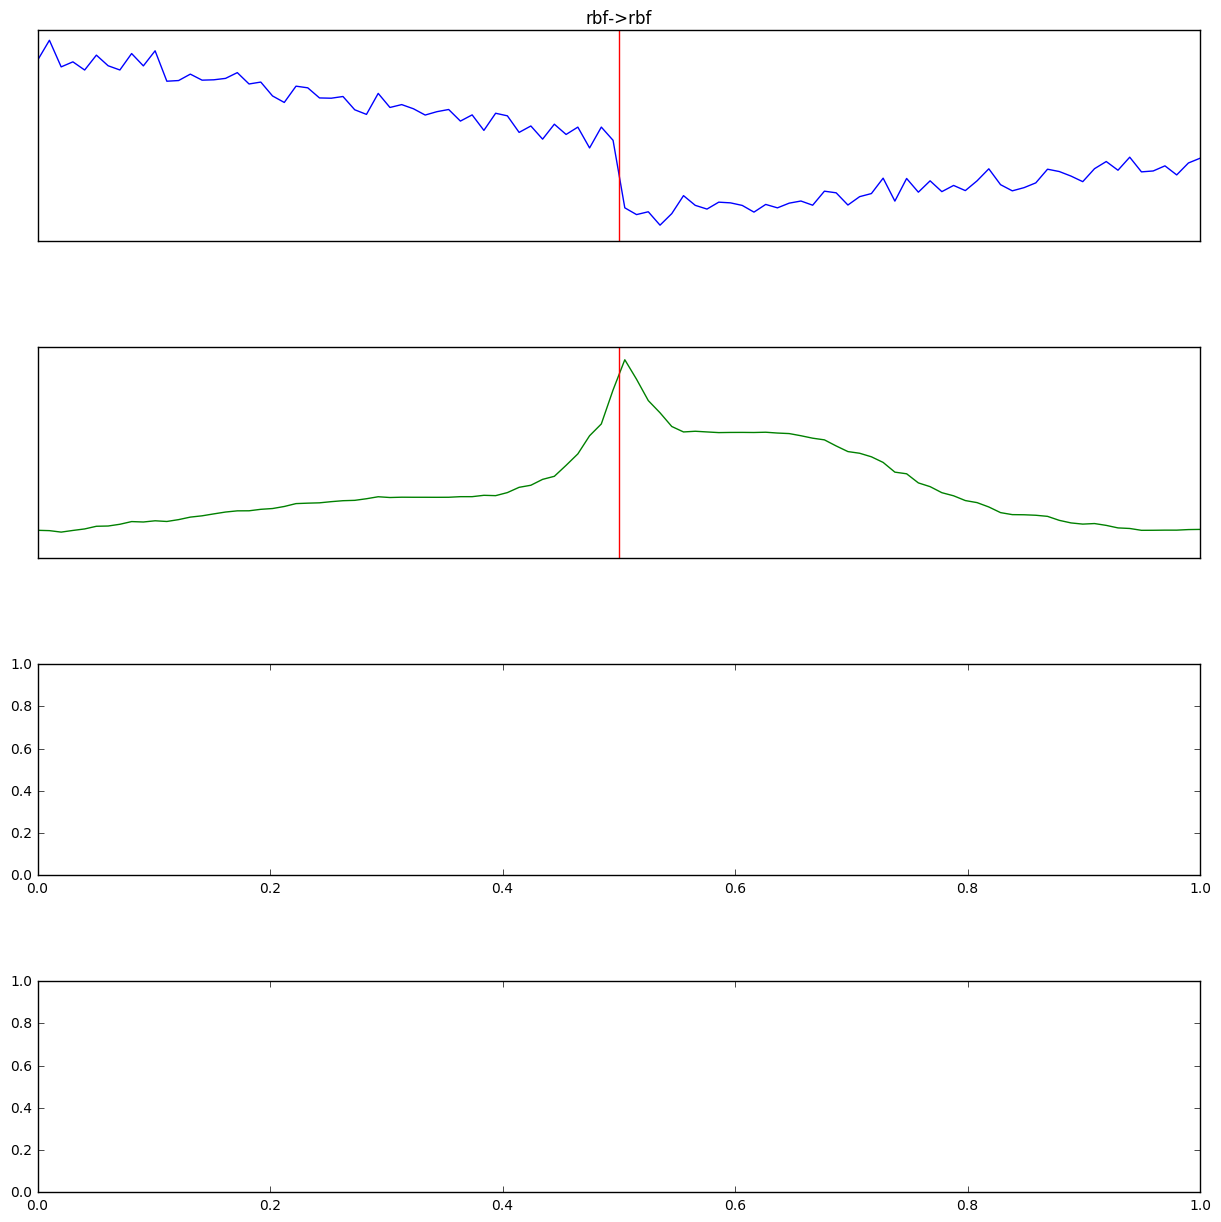

In [1]:


import numpy as np
import numpy.matlib
import matplotlib
matplotlib.use('pdf')
import GPy
from matplotlib import pyplot as plt
% matplotlib inline

def liklihood_ratio(cov1,cov2, X):
    N = len(X)
    lrlist = []
    for cp in range(N):
        altcov = np.zeros((N,N))
        altcov[:cp,:cp] = cov1[:cp,:cp]
        altcov[cp:,cp:] = cov2[cp:,cp:]
        invcov = np.linalg.inv(cov1)
        invaltcov = np.linalg.inv(altcov)
        
        lr = np.dot(np.matmul(np.transpose(X),invcov-invaltcov),X) + np.log(np.linalg.det(cov1)/np.linalg.det(altcov))

        lrlist.append(lr)
    
    return max(lrlist), lrlist.index(max(lrlist)), lrlist
        
        
N = 100
X = np.linspace(0.,1.,N) # [0,1] 사이에 균일한 거리를 둔 500 개의 point 정의
X = X.reshape((-1,1)) # reshape X to make it n*1



fig, axs = plt.subplots(4,1, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.05)

axs = axs.ravel()


kern1 = GPy.kern.RBF(1,10.0)
kern2 = GPy.kern.RBF(1,10.0)

mu = np.zeros((N)) # vector of the means
# RBF Kernel
C1 = kern1.K(X,X) + np.diag(np.random.normal(0.1,0.01,N),0) # covariance matrix
C2 = kern2.K(X,X) + np.diag(np.random.normal(0.1,0.01,N),0)
C = np.zeros((N,N))
C[:int(N/2),:int(N/2)] = C1[:int(N/2),:int(N/2)]
C[int(N/2):,int(N/2):] = C2[int(N/2):,int(N/2):]

Z = np.random.multivariate_normal(mu,C,20)



#         for i in range(5):
#             axs[i].plot(X[:],Z[i,:])
#             axs[i].axvline(x=0.5,color='red')
axs_pos = 0
axs[axs_pos].plot(X[:],Z[0,:])
axs[axs_pos].axvline(x=0.5,color='red')
axs[axs_pos].tick_params(labelbottom='off')
#axs[i*9+j].axis('off')
axs[axs_pos].set_title('%s->%s'%(kern1.name[:4],kern2.name[:4]))
axs[axs_pos].set_xticks([])
axs[axs_pos].set_yticks([])

lr ,ind, lrlist = liklihood_ratio(C1,C2, Z[0,:])
axs[axs_pos+1].plot(X[:],lrlist, color='g')
axs[axs_pos+1].axvline(x=float(ind)/len(lrlist),color='red')
axs[axs_pos+1].set_xticks([])
axs[axs_pos+1].set_yticks([])

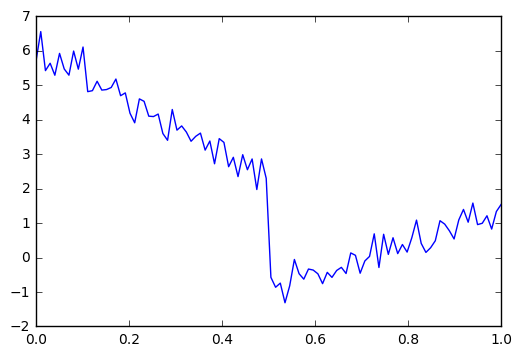

In [2]:
plt.plot(X[:], Z[0,:])

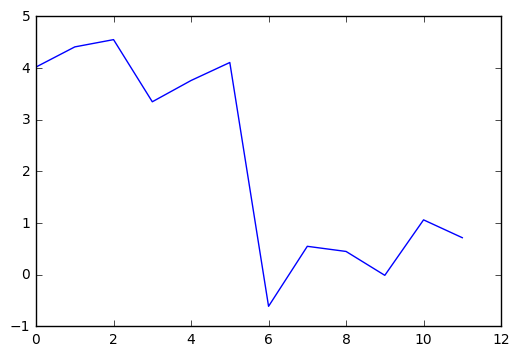

In [72]:
plt.plot(Z[0, :])

In [4]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

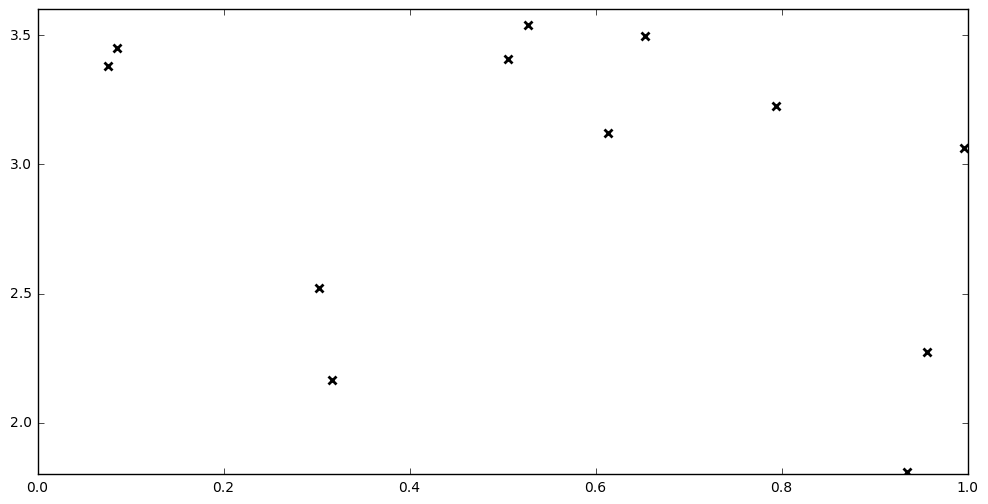

In [5]:
N = 12
X = np.random.rand(N,1)
Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
plt.plot(X, Y, 'kx', mew=2)

In [77]:
k.K(X,X)

TypeError: Expected float64, got <gpflow.param.Param object at 0x000001C51D045D30> of type 'Param' instead.

In [60]:
import time
st = time.time()
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.gpr.GPR(X, Y, kern=k)
# m = gpflow.models.SGPR(X, Y, kern=k, Z=X.copy())
m.likelihood.variance = 0.1
print(time.time() - st)
m.optimize(disp=1)
# m.optimize()
print(time.time() - st)

0.0
0.9156460762023926


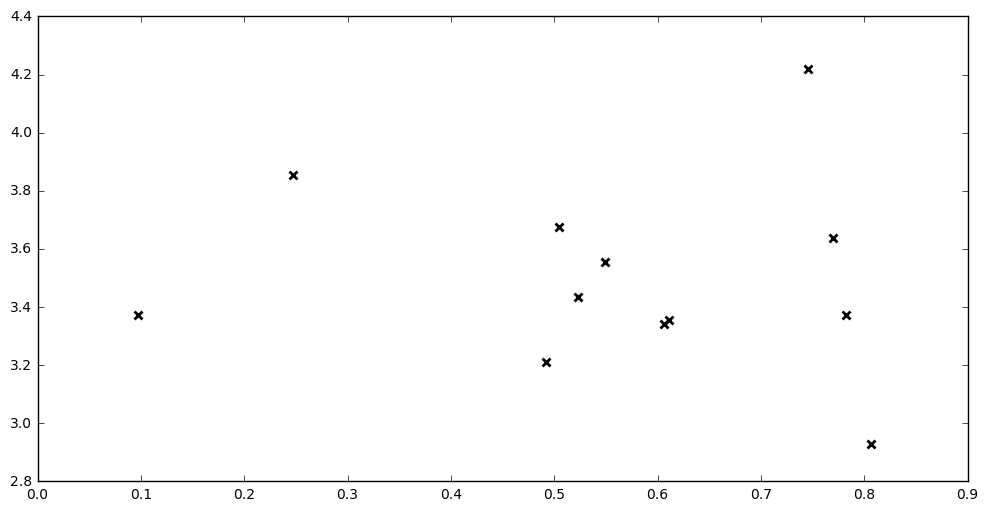

In [61]:
N = 12
X = np.random.rand(N,1)
Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
plt.plot(X, Y, 'kx', mew=2)

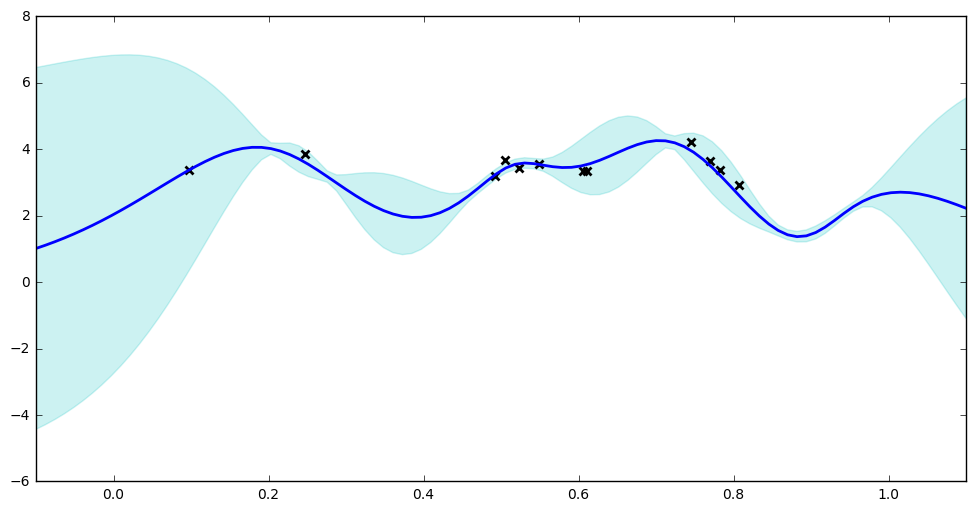

In [62]:

def plot(m):
    xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, lw=2)
    plt.fill_between(xx[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(-0.1, 1.1)
    
plot(m)

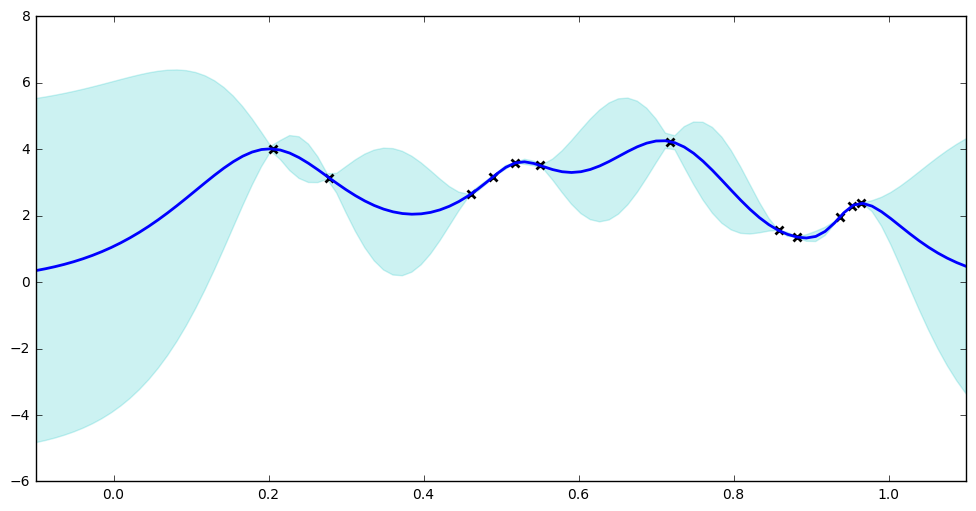

In [59]:
plot(m)

In [17]:
st = time.time()
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.gpr.GPR(X, Y, kern=k)
# m = gpflow.models.SGPR(X, Y, kern=k, Z=X.copy())
m.likelihood.variance = 0.01
print(time.time() - st)

0.0010006427764892578


In [58]:
st = time.time()
m.X = X#[:4:7]
m.Y = Y#[:4:7]
m.optimize(disp=1)
# m.optimize()
print(time.time() - st)

0.16710901260375977


In [58]:
st = time.time()
m = gpflow.gpr.GPR(X, Y, kern=k)
m.optimize(disp=1)
# m.optimize()
print(time.time() - st)

0.40427207946777344


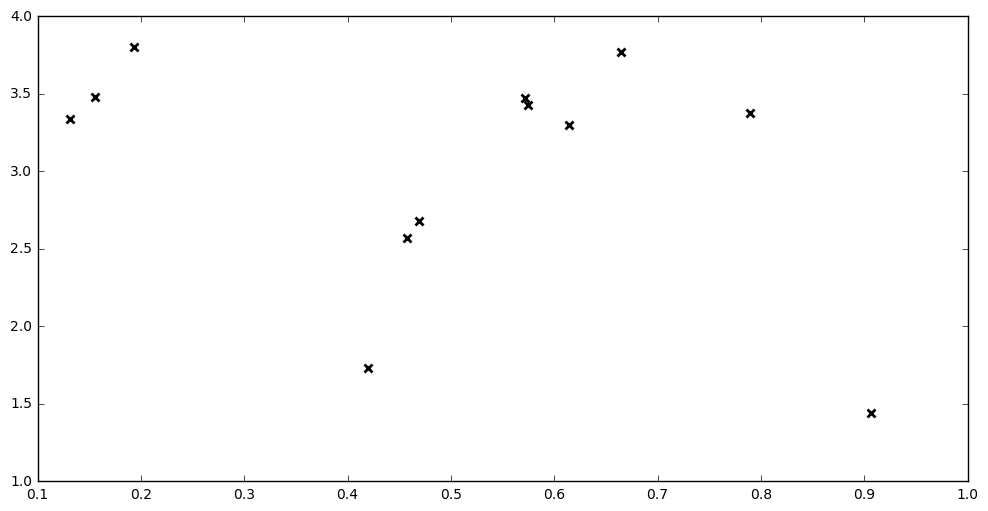

In [3]:
N = 12
X = np.random.rand(N,1)
Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
plt.plot(X, Y, 'kx', mew=2)

In [20]:
X.copy()

array([[ 0.04017252],
       [ 0.96457603],
       [ 0.3767287 ],
       [ 0.95329786],
       [ 0.7337902 ],
       [ 0.10601916],
       [ 0.54870527],
       [ 0.31003047],
       [ 0.08436051],
       [ 0.03512718],
       [ 0.54001714],
       [ 0.75373119]])

In [8]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.models.GPR(X, Y, kern=k)
m.likelihood.variance = 0.01
opt = gpflow.train.ScipyOptimizer()

In [37]:
import time
with gpflow.defer_build():
    k = gpflow.kernels.Matern52(1, lengthscales=0.3)
    m = gpflow.models.GPR(X, Y, kern=k)
    m.likelihood.variance = 0.01
    opt = gpflow.train.ScipyOptimizer(max_iter=10)

m.compile()

In [5]:
m

In [23]:
import time
st = time.time()
opt.minimize(m)
print(time.time() - st)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.334868
  Number of iterations: 0
  Number of functions evaluations: 1
0.8801364898681641


In [1]:
import time
st = time.time()
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.models.GPR(X, Y, kern=k)
# m = gpflow.models.SGPR(X, Y, kern=k, Z=X.copy())
m.likelihood.variance = 0.01
gpflow.train.ScipyOptimizer(options=dict(maxiter=200)).minimize(m)
# m.optimize()
print(time.time() - st)

NameError: name 'gpflow' is not defined

In [43]:
opt = gpflow.train.ScipyOptimizer(options=dict(maxiter=5))

In [60]:
import tensorflow as tf

with tf.Session() as sess:
    st = time.time()
    k = gpflow.kernels.Matern52(1, lengthscales=0.3)
    m = gpflow.models.GPR(X, Y, kern=k)
    # m = gpflow.models.SGPR(X, Y, kern=k, Z=X.copy())
    m.likelihood.variance = 0.01
    gpflow.train.ScipyOptimizer(options=dict(maxiter=200)).minimize(m)
    # m.optimize()
    print(time.time() - st)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 11.463949
  Number of iterations: 18
  Number of functions evaluations: 20
4.050869941711426


In [51]:
st = time.time()
opt.minimize(m)
# m.optimize()
print(time.time() - st)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 11.463949
  Number of iterations: 0
  Number of functions evaluations: 1
1.8500354290008545


In [8]:

m.compile()
opt = gpflow.train.ScipyOptimizer()

In [60]:
st = time.time()
opt.minimize(m)
print(time.time() - st)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.134213
  Number of iterations: 0
  Number of functions evaluations: 1
2.3977036476135254


In [52]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
# m = gpflow.models.GPR(X, Y, kern=k)
m = gpflow.models.SGPR(X, Y, kern=k, Z=X.copy())
m.likelihood.variance = 0.01
gpflow.train.ScipyOptimizer().minimize(m)
# m.optimize()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 12.679524
  Number of iterations: 149
  Number of functions evaluations: 177


In [19]:
a = range(10)
print(a[::2])

range(0, 10, 2)


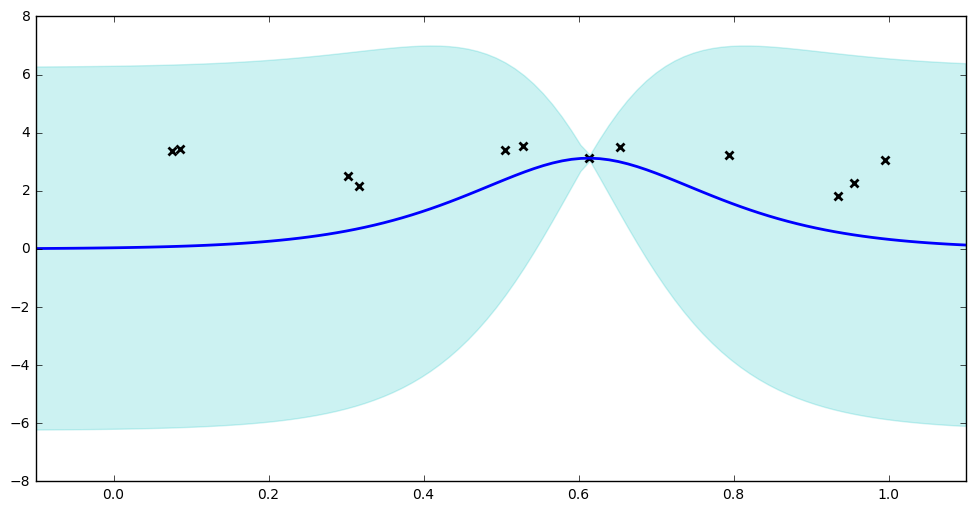

In [49]:

def plot(m):
    xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, lw=2)
    plt.fill_between(xx[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(-0.1, 1.1)
    
plot(m)